In [1]:
# Importing pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.cuda.get_device_name(0)

'GeForce 940MX'

In [2]:
torch.cuda.is_available()

True

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('iris.csv')
data.shape

(150, 6)

In [5]:
data.drop('Id', inplace=True, axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data['Species'] = np.where(data['Species']=='Iris-setosa', 0, data['Species']  )
data['Species'] = np.where(data['Species']=='Iris-virginica', 1, data['Species'])
data['Species'] = np.where(data['Species']=='Iris-versicolor', 2, data['Species'])

In [8]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [9]:
X = data.drop(['Species'], axis=1).values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
y = data['Species'].values.astype(int)
y[:5]

array([0, 0, 0, 0, 0])

In [11]:
# Splitting into train and test 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Converting arrays to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# Creating the architecture of the ANN

class ANN_Model(nn.Module):
    def __init__(self, input_features=4, hidden1=4, hidden2=4, out_features=3):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [14]:
# Instantiate the model
torch.manual_seed(1)
model = ANN_Model()

In [15]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=4, out_features=4, bias=True)
  (f_connected2): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)>

In [16]:
# Backpropagation - Loss function, optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
# Hyperparameters
epochs = 500
final_losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if(i%10==0):
        print("In Epoch {}, the loss is: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In Epoch 10, the loss is: 0.9261073470115662
In Epoch 20, the loss is: 0.7454518675804138
In Epoch 30, the loss is: 0.5518718957901001
In Epoch 40, the loss is: 0.4333936870098114
In Epoch 50, the loss is: 0.36507537961006165
In Epoch 60, the loss is: 0.3089636564254761
In Epoch 70, the loss is: 0.24642761051654816
In Epoch 80, the loss is: 0.18087629973888397
In Epoch 90, the loss is: 0.1265057772397995
In Epoch 100, the loss is: 0.09071500599384308
In Epoch 110, the loss is: 0.06998683512210846
In Epoch 120, the loss is: 0.058076463639736176
In Epoch 130, the loss is: 0.05081937089562416
In Epoch 140, the loss is: 0.046036433428525925
In Epoch 150, the loss is: 0.04262401536107063
In Epoch 160, the loss is: 0.040023136883974075
In Epoch 170, the loss is: 0.0379377044737339
In Epoch 180, the loss is: 0.03620614483952522
In Epoch 190, the loss is: 0.034730635583400726
In Epoch 200, the loss is: 0.03344856947660446
In Epoch 210, the loss is: 0.0323169007897377
In Epoch 220, the loss is:

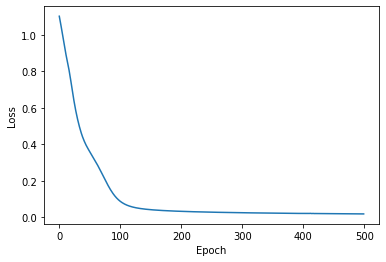

In [18]:
# Loss function
plt.plot(range(epochs), final_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:
# Predicting on test data
predictions = []
with torch.no_grad():
    for i, (test_data, actual) in enumerate(zip(X_test, y_test)):
        y_pred = model(test_data)
        predict = y_pred.argmax().item()
        predictions.append(predict)
        print("Predicted: ", predict, "; Actual: ", actual.item())

Predicted:  0 ; Actual:  0
Predicted:  0 ; Actual:  0
Predicted:  1 ; Actual:  1
Predicted:  2 ; Actual:  2
Predicted:  0 ; Actual:  0
Predicted:  0 ; Actual:  0
Predicted:  0 ; Actual:  0
Predicted:  0 ; Actual:  0
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  1 ; Actual:  1
Predicted:  0 ; Actual:  0
Predicted:  0 ; Actual:  0
Predicted:  1 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  0 ; Actual:  0
Predicted:  2 ; Actual:  2
Predicted:  0 ; Actual:  0
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  1 ; Actual:  1
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  2 ; Actual:  2
Predicted:  1 ; Actual:  1


In [20]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

F:\Installed\Anaconda3\envs\torch\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


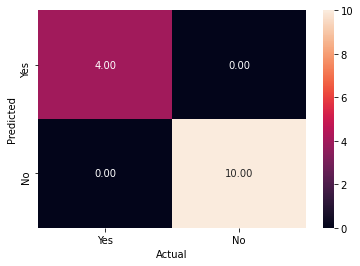

In [21]:
# Confusion matrix
draw_cm(y_test.tolist(), predictions)

In [22]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test.tolist(), predictions)
score

0.9666666666666667

In [23]:
# Saving the model
torch.save(model, 'iris.pt')

In [24]:
# Next time loading the model
loaded_model = torch.load('iris.pt')

In [25]:
loaded_model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=4, out_features=4, bias=True)
  (f_connected2): Linear(in_features=4, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=3, bias=True)
)

In [26]:
# Prediction on new data point
random_sample = list(data.iloc[75,:-1])
random_sample

[6.6, 3.0, 4.4, 1.4]

In [27]:
random_sample = [6.3, 3.5, 4.9, 1.1]
new_data = torch.tensor(random_sample)

In [28]:
# Predict on new data
with torch.no_grad():
    y_pred = model(new_data)
    prediction = y_pred.argmax().item()
    print("Predicted: ", prediction)

Predicted:  2
